In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
import json
import datetime
from scipy.signal import argrelextrema
from statsmodels.nonparametric.kernel_regression import KernelReg
from collections import defaultdict

In [30]:
from datetime import date, timedelta
ini = date.today() - timedelta(days=1460) # 4 years ago
ini2 = date.today() - timedelta(days=729) # 2 years ago
today = date.today()
ini_str = str(ini)
ini2_str = str(ini2)
today_str = str(today)
print(ini_str)
print(ini2_str)
print(today_str)

2019-11-30
2021-11-30
2023-11-29


In [31]:
tickers = ['AAPL','META']
yahoo_financials = YahooFinancials (tickers)
historical_stock_prices = yahoo_financials.get_historical_price_data(ini_str, today_str, 'daily')

In [32]:
del df_d

In [33]:
index = 1
df_d = pd.DataFrame()
for ticker in tickers:
    index+=1
    tupla = pd.DataFrame(historical_stock_prices[ticker]['prices'])
    if index==1:        
        df_d = tupla
    else:
        df_d = pd.concat([df_d, tupla], ignore_index=True)
df_d = df_d.drop('date',axis=1)
df_d.rename(columns={"formatted_date": "date"}, inplace = True)
df_d['date']=pd.to_datetime(df_d['date'])


In [34]:
df_d

,high,low,open,close,volume,adjclose,date
0,67.062500,65.862503,66.817497,66.040001,94487200,64.338272,2019-12-02
1,64.882500,64.072502,64.577499,64.862503,114430400,63.191124,2019-12-03
2,65.827499,65.169998,65.267502,65.434998,67181600,63.748878,2019-12-04
3,66.472504,65.682503,65.947502,66.394997,74424400,64.684128,2019-12-05
4,67.750000,66.824997,66.870003,67.677498,106075600,65.933594,2019-12-06
...,...,...,...,...,...,...,...
2005,339.899994,335.899994,338.329987,336.980011,12027900,336.980011,2023-11-21
2006,342.920013,338.579987,339.209991,341.489990,10702700,341.489990,2023-11-22
2007,341.859985,336.769989,340.130005,338.230011,5467500,338.230011,2023-11-24
2008,339.899994,334.200012,336.179993,334.700012,15684500,334.700012,2023-11-27


In [35]:
index = 1
df_d = pd.DataFrame()
for ticker in tickers:
    print(ticker)
    print(index)
    index+=1
    tupla = pd.DataFrame(historical_stock_prices[ticker]['prices'])
    tupla['companyName']=ticker
    tupla['SMA100'] = tupla['close'].rolling(100).mean()
    tupla.dropna(inplace=False)
    tupla['SMA200'] = tupla['close'].rolling(200).mean()
    tupla.dropna(inplace=False)
    if index==1:        
        df_d = tupla
    else:
        df_d = pd.concat([df_d, tupla],ignore_index=True)
df_d = df_d.drop('date',axis=1)
df_d.rename(columns={"formatted_date": "date"}, inplace = True)
df_d['date']=pd.to_datetime(df_d['date'])

AAPL
1
META
2


In [36]:
df_d.tail(50)

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200
1960,306.170013,299.809998,302.480011,305.070007,15924400,305.070007,2023-09-19,META,282.369001,224.60460
1961,308.059998,299.429993,305.049988,299.670013,19379500,299.670013,2023-09-20,META,282.980101,225.50075
1962,300.260010,293.269989,295.700012,295.730011,21300500,295.730011,2023-09-21,META,283.534201,226.36195
1963,305.380005,298.269989,299.299988,299.079987,25369600,299.079987,2023-09-22,META,284.093201,227.24520
1964,300.950012,293.700012,295.640015,300.829987,18987000,300.829987,2023-09-25,META,284.709101,228.17875
1965,300.299988,296.010010,297.660004,298.959991,19417200,298.959991,2023-09-26,META,285.328401,229.10390
1966,301.299988,286.790009,300.450012,297.739990,36429800,297.739990,2023-09-27,META,285.970601,230.01595
1967,306.329987,296.700012,298.940002,303.959991,22167100,303.959991,2023-09-28,META,286.682401,230.95625
1968,310.640015,299.359985,307.380005,300.209991,25356600,300.209991,2023-09-29,META,287.351800,231.88375
1969,307.179993,301.630005,302.739990,306.820007,16265600,306.820007,2023-10-02,META,288.086301,232.81710


In [37]:
def find_extrema(s, bw='cv_ls'):
    """
    Input:
        s: prices as pd.series
        bw: bandwith as str or array like
    Returns:
        prices: with 0-based index as pd.series
        extrema: extrema of prices as pd.series
        smoothed_prices: smoothed prices using kernel regression as pd.series
        smoothed_extrema: extrema of smoothed_prices as pd.series
    """
    # Copy series so we can replace index and perform non-parametric
    # kernel regression.
    prices = s.copy()
    prices = prices.reset_index()
    
    #print(prices.head(5))
    prices.columns = ['index','date','close']
    
    #prices.columns = ['date', 'close', 'date2']
    fechas = prices['date']
    prices = prices['close']
    
    
    #prices = s.copy()
    #prices.columns = ['date', 'price']
    #prices = pd.DataFrame(s)
    #prices = prices['close']
    
    #print(type(prices))
    #print("===============")
    #print(prices)
    #print("===============")
    #print(prices.index)

    kr = KernelReg(
        [prices.values],
        [prices.index.to_numpy()],
        var_type='c', bw=bw
    )
    f = kr.fit([prices.index.values])

    # Use smoothed prices to determine local minima and maxima
    smooth_prices = pd.Series(data=f[0], index=prices.index)
    smooth_local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    smooth_local_min = argrelextrema(smooth_prices.values, np.less)[0]
    local_max_min = np.sort(
        np.concatenate([smooth_local_max, smooth_local_min]))
    smooth_extrema = smooth_prices.loc[local_max_min]

    # Iterate over extrema arrays returning datetime of passed
    # prices array. Uses idxmax and idxmin to window for local extrema.
    price_local_max_dt = []
    for i in smooth_local_max:
        if (i > 1) and (i < len(prices)-1):
            price_local_max_dt.append(prices.iloc[i-2:i+2].idxmax())

    price_local_min_dt = []
    for i in smooth_local_min:
        if (i > 1) and (i < len(prices)-1):
            price_local_min_dt.append(prices.iloc[i-2:i+2].idxmin())

    maxima = pd.Series(prices.loc[price_local_max_dt])
    minima = pd.Series(prices.loc[price_local_min_dt])
    extrema = pd.concat([maxima, minima]).sort_index()
  

    # Return series for each with bar as index
    return extrema, prices, smooth_extrema, smooth_prices, maxima, minima, fechas


def find_patterns(extrema, max_bars=35):
    """
    Input:
        extrema: extrema as pd.series with bar number as index
        max_bars: max bars for pattern to play out
    Returns:
        patterns: patterns as a defaultdict list of tuples
        containing the start and end bar of the pattern
    """
    patterns = defaultdict(list)

    # Need to start at five extrema for pattern generation
    for i in range(5, len(extrema)):
        window = extrema.iloc[i-5:i]

        # A pattern must play out within max_bars (default 35)
        if (window.index[-1] - window.index[0]) > max_bars:
            continue

        # Using the notation from the paper to avoid mistakes
        e1 = window.iloc[0]
        e2 = window.iloc[1]
        e3 = window.iloc[2]
        e4 = window.iloc[3]
        e5 = window.iloc[4]

        rtop_g1 = np.mean([e1, e3, e5])
        rtop_g2 = np.mean([e2, e4])
        # Head and Shoulders
        if (e1 > e2) and (e3 > e1) and (e3 > e5) and \
                (abs(e1 - e5) <= 0.03*np.mean([e1, e5])) and \
                (abs(e2 - e4) <= 0.03*np.mean([e1, e5])):
            patterns['HS'].append((window.index[0], window.index[-1]))

        # Inverse Head and Shoulders
        elif (e1 < e2) and (e3 < e1) and (e3 < e5) and \
                (abs(e1 - e5) <= 0.03*np.mean([e1, e5])) and \
                (abs(e2 - e4) <= 0.03*np.mean([e1, e5])):
            patterns['IHS'].append((window.index[0], window.index[-1]))

        # Broadening Top
        elif (e1 > e2) and (e1 < e3) and (e3 < e5) and (e2 > e4):
            patterns['BTOP'].append((window.index[0], window.index[-1]))

        # Broadening Bottom
        elif (e1 < e2) and (e1 > e3) and (e3 > e5) and (e2 < e4):
            patterns['BBOT'].append((window.index[0], window.index[-1]))

        # Triangle Top
        elif (e1 > e2) and (e1 > e3) and (e3 > e5) and (e2 < e4):
            patterns['TTOP'].append((window.index[0], window.index[-1]))

        # Triangle Bottom
        elif (e1 < e2) and (e1 < e3) and (e3 < e5) and (e2 > e4):
            patterns['TBOT'].append((window.index[0], window.index[-1]))

        # Rectangle Top
        elif (e1 > e2) and \
                (abs(e1-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e3-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e5-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e2-rtop_g2)/rtop_g2 < 0.0075) and \
                (abs(e4-rtop_g2)/rtop_g2 < 0.0075) and \
                (min(e1, e3, e5) > max(e2, e4)):

            patterns['RTOP'].append((window.index[0], window.index[-1]))

        # Rectangle Bottom
        elif (e1 < e2) and \
                (abs(e1-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e3-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e5-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e2-rtop_g2)/rtop_g2 < 0.0075) and \
                (abs(e4-rtop_g2)/rtop_g2 < 0.0075) and \
                (max(e1, e3, e5) > min(e2, e4)):

            patterns['RBOT'].append((window.index[0], window.index[-1]))

    return patterns


def plot_window(prices, extrema, smooth_prices, smooth_extrema, ax=None):
    """
    Input: data from find_extrema
    Output: plots window for actual and smoothed prices and extrema
    """
    
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    prices.plot(ax=ax, color='dodgerblue')
    ax.scatter(extrema.index, extrema.values, color='red')
    #ax.scatter(maxima.index, maxima.values, color='red')
    #ax.scatter(minima.index, minima.values, color='black')
    smooth_prices.plot(ax=ax, color='lightgrey')
    ax.scatter(smooth_extrema.index, smooth_extrema.values, color='lightgrey')

In [38]:
df_d2 = df_d
index = 1
df_min = pd.DataFrame()
df_max = pd.DataFrame()
tickers = ['AAPL','META']
for ticker in tickers:
    print(ticker)
    print(index)
    index+=1
    tuplas = df_d2.query("companyName==@ticker")
    tuplas2 = tuplas[['date','close']]
   
   
    extrema, prices, smooth_extrema, smooth_prices, maxima, minima, fechas = find_extrema(tuplas2, bw=[1.5])
    
    minima2 = minima.to_frame()
    minima2.rename(columns={"close": "close_min"}, inplace = True)
    minima2['companyName']=ticker    
    minima2 = pd.concat([minima2, fechas], join = 'outer', axis=1)
    

    maxima2 = maxima.to_frame()
    maxima2.rename(columns={"close": "close_max"}, inplace = True)
    maxima2['companyName']=ticker
    maxima2 = pd.concat([maxima2, fechas], join = 'outer', axis=1)
    
    if index==1:        
        df_min = minima2
        df_max = maxima2
    else:
        df_min = pd.concat([df_min, minima2],ignore_index=True)
        df_max = pd.concat([df_max, maxima2],ignore_index=True)
    #del tuplas, tuplas2, extrema, prices, smooth_extrema, smooth_prices, maxima, minima, minima2, maxima2


#print(df_min.head(5))
#print(df_max.head(5))
df_d2 = pd.merge(df_d2, df_min[['date','companyName', 'close_min']], on = ['companyName','date'], how='left')
df_d2 = pd.merge(df_d2, df_max[['date','companyName', 'close_max']], on = ['companyName','date'], how='left')

AAPL
1
META
2


In [39]:
df_d

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200
0,67.062500,65.862503,66.817497,66.040001,94487200,64.338272,2019-12-02,AAPL,NaN,NaN
1,64.882500,64.072502,64.577499,64.862503,114430400,63.191124,2019-12-03,AAPL,NaN,NaN
2,65.827499,65.169998,65.267502,65.434998,67181600,63.748878,2019-12-04,AAPL,NaN,NaN
3,66.472504,65.682503,65.947502,66.394997,74424400,64.684128,2019-12-05,AAPL,NaN,NaN
4,67.750000,66.824997,66.870003,67.677498,106075600,65.933594,2019-12-06,AAPL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2005,339.899994,335.899994,338.329987,336.980011,12027900,336.980011,2023-11-21,META,307.0646,265.52455
2006,342.920013,338.579987,339.209991,341.489990,10702700,341.489990,2023-11-22,META,307.6193,266.27390
2007,341.859985,336.769989,340.130005,338.230011,5467500,338.230011,2023-11-24,META,308.0579,267.04790
2008,339.899994,334.200012,336.179993,334.700012,15684500,334.700012,2023-11-27,META,308.4850,267.83180


In [40]:
#====== grafica de una empresa todas las subidad y bajadas ======
#df_grafico = df_d.query("companyName=='AAPL'")
local_max = argrelextrema(df_d.query("companyName=='AAPL'")['close'].values, np.greater)[0]
local_min = argrelextrema(df_d.query("companyName=='AAPL'")['close'].values, np.less)[0]

aapl = df_d[['close','date']]

highs = aapl.iloc[local_max,:]
lows = aapl.iloc[local_min,:]



fig = plt.figure(figsize=[20,14])
#fig = plt.figure()
#highslows = pd.concat([highs,lows])

#print (type(highslows))
#print (highslows)

#plt.subplot(121)
#plt.plot(highslows, color='green', label = 'close')
#highslows_sorted = highslows.sort_values('date')

#print (highslows_sorted)
#plt.subplot(122)
#plt.plot(df_d.query("companyName=='AAPL'")['date'],aapl['close'], color='blue', label = 'close')
#plt.scatter(highslows_sorted['date'],highslows_sorted['close'], color='red', marker = '*')


<Figure size 2000x1400 with 0 Axes>

TBOT: 44 occurences
IHS: 40 occurences
RTOP: 8 occurences
HS: 46 occurences
TTOP: 35 occurences
RBOT: 18 occurences
BTOP: 2 occurences


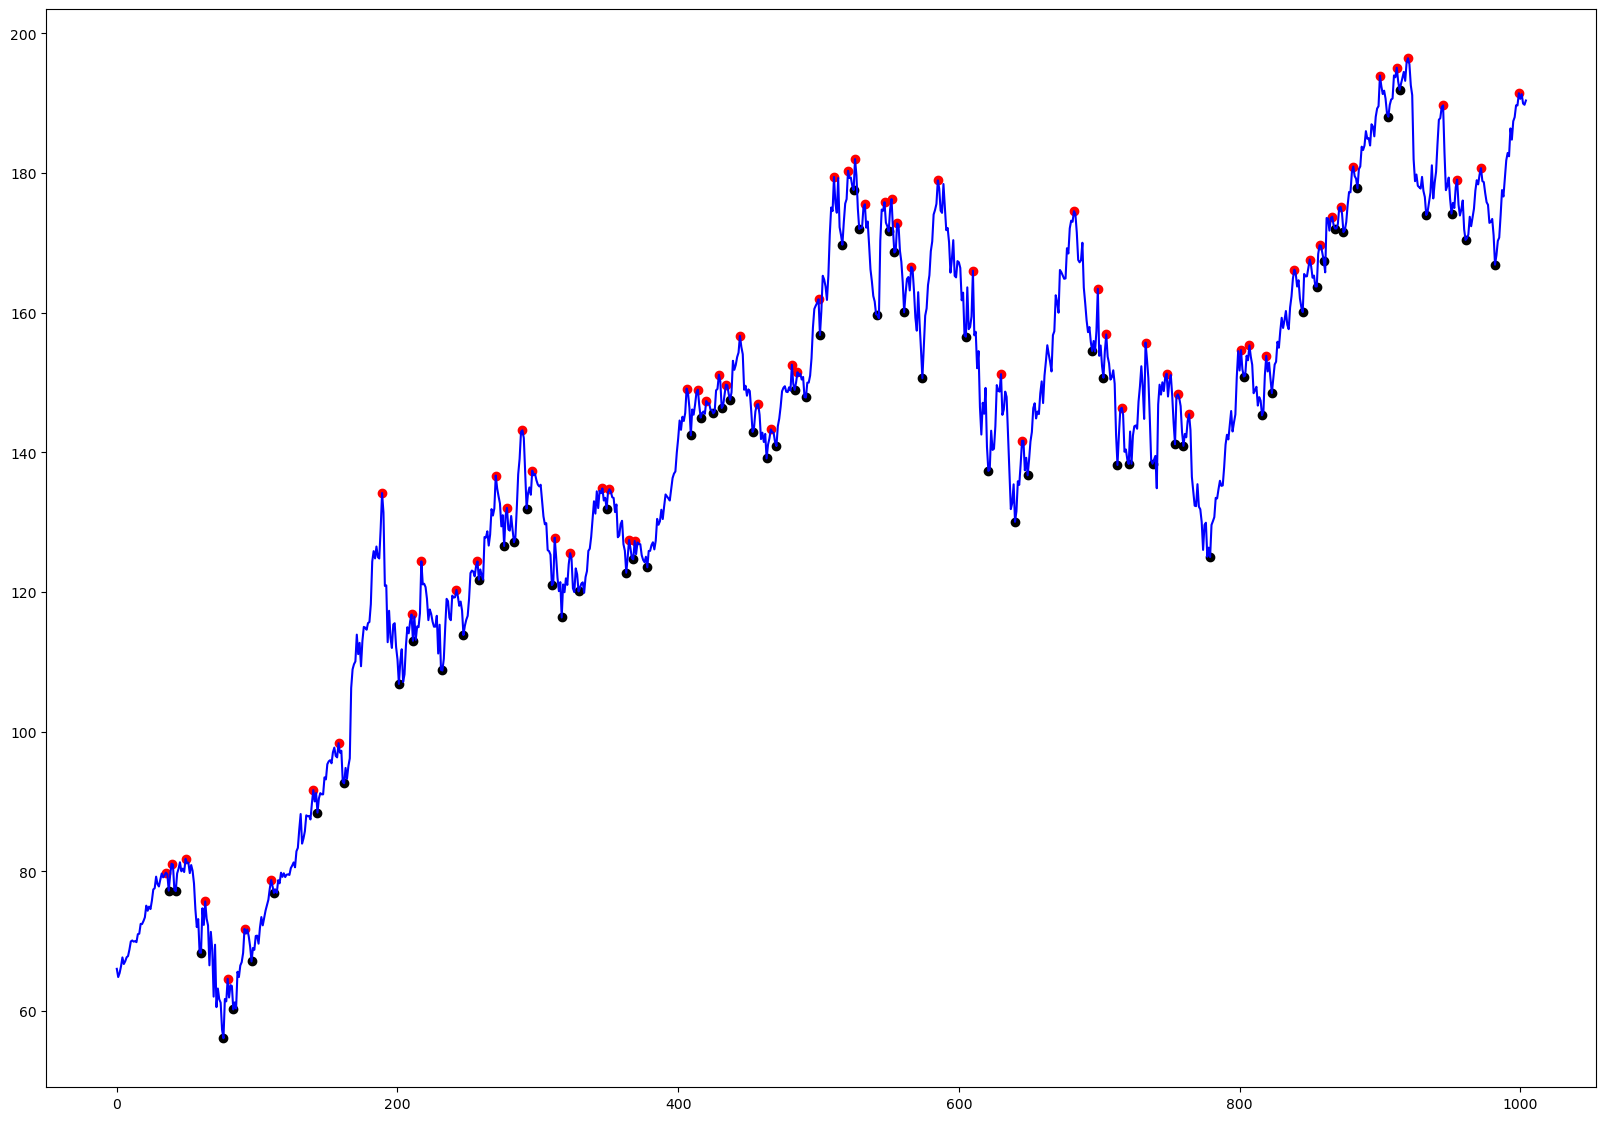

In [41]:
#====== grafica de una empresa, solo cambio de tendencia ======
tuplas = df_d2.query("companyName=='AAPL'")
tuplas2 = tuplas[['date','close']]
extrema, prices, smooth_extrema, smooth_prices, maxima, minima, fechas = find_extrema(tuplas2, bw=[1.5])

patterns = find_patterns(prices)

#print(prices)

for name, pattern_periods in patterns.items():
    print(f"{name}: {len(pattern_periods)} occurences")
   # print(pattern_periods)
    

#plot_window (prices, extrema, smooth_prices, smooth_extrema, ax=None)

fig = plt.figure(figsize=[20,14])
ax = fig.add_subplot(111)
#plt.subplot(121)
#plt.plot(highslows, color='green', label = 'close')


#plt.subplot(122)
plt.plot(prices, color='blue', label = 'close')
#ax.scatter(extrema.index, extrema.values, color='red')
ax.scatter(maxima.index, maxima.values, color='red')
ax.scatter(minima.index, minima.values, color='black')
#plt.scatter(highslows_sorted['date'],highslows_sorted['close'], color='red', marker = '*')

In [42]:
df_d2["pga01"] = df_d2["close_min"]
df_d2["open_sig"] = df_d2["open"].shift(-1) #apertura siguiente dia, para saber si es un GAP

In [43]:
df_d2

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200,close_min,close_max,pga01,open_sig
0,67.062500,65.862503,66.817497,66.040001,94487200,64.338272,2019-12-02,AAPL,NaN,NaN,NaN,NaN,NaN,64.577499
1,64.882500,64.072502,64.577499,64.862503,114430400,63.191124,2019-12-03,AAPL,NaN,NaN,NaN,NaN,NaN,65.267502
2,65.827499,65.169998,65.267502,65.434998,67181600,63.748878,2019-12-04,AAPL,NaN,NaN,NaN,NaN,NaN,65.947502
3,66.472504,65.682503,65.947502,66.394997,74424400,64.684128,2019-12-05,AAPL,NaN,NaN,NaN,NaN,NaN,66.870003
4,67.750000,66.824997,66.870003,67.677498,106075600,65.933594,2019-12-06,AAPL,NaN,NaN,NaN,NaN,NaN,67.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,339.899994,335.899994,338.329987,336.980011,12027900,336.980011,2023-11-21,META,307.0646,265.52455,NaN,NaN,NaN,339.209991
2006,342.920013,338.579987,339.209991,341.489990,10702700,341.489990,2023-11-22,META,307.6193,266.27390,NaN,341.48999,NaN,340.130005
2007,341.859985,336.769989,340.130005,338.230011,5467500,338.230011,2023-11-24,META,308.0579,267.04790,NaN,NaN,NaN,336.179993
2008,339.899994,334.200012,336.179993,334.700012,15684500,334.700012,2023-11-27,META,308.4850,267.83180,334.700012,NaN,334.700012,333.399994


In [44]:
#appl2["pga01"] = appl2["close_min"]
#pga02: cambio de tendencia alcista
def pga01(df_d2):
    if df_d2['close_min'] >0:
        return 1
    else:
        return 0
df_d2['pga01'] = df_d2.apply(pga01, axis=1)


In [45]:
#pga02: los precios estan en piso fuerte, cerca a los promedios moviles 100, 200
def pga02(df_d2):
    if df_d2['close_min'] - df_d2['SMA100']<=2 or df_d2['close_min'] - df_d2['SMA200']<=2 or df_d2['close_min']<df_d2['SMA100'] or df_d2['close_min']<df_d2['SMA200']:
        return 1
    else:
        return 0
df_d2['pga02'] = df_d2.apply(pga02, axis=1)

In [46]:
#pga03 La primera vela es GAP, apertura de manana esta mas arriba que el cierre de hoy y es verde
def pga03(df_d2):
    if df_d2['open_sig'] > df_d2['close']:
        return 1
    else:
        return 0
df_d2['pga03'] = df_d2.apply(pga03, axis=1)

In [47]:
df_d2.query("pga03==1")

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200,close_min,close_max,pga01,open_sig,pga02,pga03
1,64.882500,64.072502,64.577499,64.862503,114430400,63.191124,2019-12-03,AAPL,NaN,NaN,NaN,NaN,0,65.267502,0,1
2,65.827499,65.169998,65.267502,65.434998,67181600,63.748878,2019-12-04,AAPL,NaN,NaN,NaN,NaN,0,65.947502,0,1
3,66.472504,65.682503,65.947502,66.394997,74424400,64.684128,2019-12-05,AAPL,NaN,NaN,NaN,NaN,0,66.870003,0,1
5,67.699997,66.227501,67.500000,66.730003,128042400,65.010506,2019-12-09,AAPL,NaN,NaN,NaN,NaN,0,67.150002,0,1
6,67.517502,66.464996,67.150002,67.120003,90420400,65.390457,2019-12-10,AAPL,NaN,NaN,NaN,NaN,0,67.202499,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,315.549988,311.019989,312.549988,314.600006,16754100,314.600006,2023-11-03,META,301.5343,255.16815,NaN,NaN,0,315.980011,0,1
1994,318.329987,314.450012,315.980011,315.799988,12887700,315.799988,2023-11-06,META,301.9588,256.05030,NaN,NaN,0,317.059998,0,1
1999,332.329987,325.700012,326.200012,329.190002,16908900,329.190002,2023-11-13,META,303.9931,260.50110,NaN,NaN,0,334.540009,0,1
2000,338.100006,333.329987,334.540009,336.309998,17179400,336.309998,2023-11-14,META,304.4689,261.44735,NaN,NaN,0,337.929993,0,1


In [48]:
#Nos quedamos con dataframe que solo cumpla las 3 condiciones
df_pga = df_d2[['companyName','date','open','close','open_sig','pga01','pga02', 'pga03']].query('pga02 == 1 and pga02 == 1 and pga03==1')
df_pga = df_pga.reset_index()
df_pga['id_posiblegpa'] = df_pga.index+1
df_pga.drop(columns='index')

,companyName,date,open,close,open_sig,pga01,pga02,pga03,id_posiblegpa
0,AAPL,2020-11-02,109.110001,108.769997,109.660004,1,1,1,1
1,AAPL,2020-11-23,117.180000,113.849998,113.910004,1,1,1,2
2,AAPL,2021-02-25,124.680000,120.989998,122.589996,1,1,1,3
3,AAPL,2021-03-08,120.930000,116.360001,119.029999,1,1,1,4
4,AAPL,2021-05-12,123.400002,122.769997,124.580002,1,1,1,5
5,AAPL,2021-05-19,123.160004,124.690002,125.230003,1,1,1,6
6,AAPL,2021-06-03,124.680000,123.540001,124.070000,1,1,1,7
7,AAPL,2021-10-04,141.759995,139.139999,139.490005,1,1,1,8
8,AAPL,2021-10-13,141.240005,140.910004,142.110001,1,1,1,9
9,AAPL,2021-11-11,148.960007,147.869995,148.429993,1,1,1,10


In [49]:
print(df_pga.shape[0]) #cantidad de casos
print(df_d.shape[0])
print(df_d2.shape[0]) # cantidad total de dias

42
2010
2010


In [50]:
# =====Se identifica los siguientes dias que cerro con vela verde======
id_new = 1
df_pga2 = df_d2[['companyName','date','open', 'close']].query('open<=close and 1<0')  

for i in df_pga.index:
    print("index:",i, "fecha:", df_pga['date'][i])
    j=0
    fec_today = df_pga['date'][i]
    companyName = df_pga['companyName'][i]
    fec_tomorrow = fec_today + pd.DateOffset(days=1)
    k=0
    while j<=0:              
        if fec_tomorrow.date()<= today:
            j=0
        else:
            j=1            
        #1 verificar si existe el dia
        tupla_new1 = df_d2[['companyName','date','open', 'close']].query('companyName==@companyName and date == @fec_tomorrow')
        if len(tupla_new1.index)>0:
            #2 revisamos si el dia fue vela alcista
            tupla_new2 = df_d2[['companyName','date','open', 'close']].query('companyName==@companyName and date == @fec_tomorrow and open<=close')    
            tupla_new2['id_posiblegpa']=id_new            
            if k==0:
                tupla_new2['id_inidia']=1
            else:
                tupla_new2['id_inidia']=0
            tupla_new2['id_ultdia']=0            
            if len(tupla_new2.index)>0:
                if len(df_d2.index)==0:                    
                    df_d2 = tupla_new2
                else:
                    #appl_pga2 = appl_pga2.append(tupla_new2)
                    #appl_pga2 = pd.concat([appl_pga2, pd.DataFrame([tupla_new2])], ignore_index=True)
                    #appl_pga2.loc[len(appl_pga2)] = tupla_new2
                    df_pga2 = pd.concat([df_pga2, tupla_new2],ignore_index=True)                    
                fec_tomorrow = fec_tomorrow + pd.DateOffset(days=1)
                k=1
                
            else:                
                #Se agrega el dia en que se perdio la subida (ultimo dia)
                tupla_new2 = df_d2[['companyName','date','open', 'close']].query('companyName==@companyName and date == @fec_tomorrow')
                tupla_new2['id_posiblegpa'] = id_new
                if k==0:
                    tupla_new2['id_inidia']=1
                else:
                    tupla_new2['id_inidia']=0
                
                tupla_new2['id_ultdia']=1
                
                df_pga2 = pd.concat([df_pga2, tupla_new2],ignore_index=True) 
                j=1
                k=1
                id_new+= int(1)
        else:         
            fec_tomorrow = fec_tomorrow + pd.DateOffset(days=1)


index: 0 fecha: 2020-11-02 00:00:00
index: 1 fecha: 2020-11-23 00:00:00
index: 2 fecha: 2021-02-25 00:00:00
index: 3 fecha: 2021-03-08 00:00:00
index: 4 fecha: 2021-05-12 00:00:00
index: 5 fecha: 2021-05-19 00:00:00
index: 6 fecha: 2021-06-03 00:00:00
index: 7 fecha: 2021-10-04 00:00:00
index: 8 fecha: 2021-10-13 00:00:00
index: 9 fecha: 2021-11-11 00:00:00
index: 10 fecha: 2022-01-26 00:00:00
index: 11 fecha: 2022-03-14 00:00:00
index: 12 fecha: 2022-04-27 00:00:00
index: 13 fecha: 2022-05-19 00:00:00
index: 14 fecha: 2022-06-16 00:00:00
index: 15 fecha: 2022-09-06 00:00:00
index: 16 fecha: 2022-09-30 00:00:00
index: 17 fecha: 2022-11-29 00:00:00
index: 18 fecha: 2022-12-07 00:00:00
index: 19 fecha: 2023-01-05 00:00:00
index: 20 fecha: 2023-10-26 00:00:00
index: 21 fecha: 2021-01-14 00:00:00
index: 22 fecha: 2021-01-29 00:00:00
index: 23 fecha: 2021-03-03 00:00:00
index: 24 fecha: 2021-10-12 00:00:00
index: 25 fecha: 2021-10-27 00:00:00
index: 26 fecha: 2021-11-10 00:00:00
index: 27 f

In [51]:
#df_pga2.query("date>='2022-01-26' and date<='2022-01-28'")
#df_pga2.query("id_inidia==1 and id_ultdia==1")

#No se toma en cuenta los casos donde el dia de inicio es el miso que el ultimo dia
df_pga2 = df_pga2.query("(id_inidia==1 and id_ultdia==0) or (id_inidia==0 and id_ultdia==1) or (id_inidia==0 and id_ultdia==0)")

In [52]:
df_pga2

,companyName,date,open,close,id_posiblegpa,id_inidia,id_ultdia
0,AAPL,2020-11-03,109.660004,110.440002,1.0,1.0,0.0
1,AAPL,2020-11-04,114.139999,114.949997,1.0,0.0,0.0
2,AAPL,2020-11-05,117.949997,119.029999,1.0,0.0,0.0
3,AAPL,2020-11-06,118.320000,118.690002,1.0,0.0,0.0
4,AAPL,2020-11-09,120.500000,116.320000,1.0,0.0,1.0
...,...,...,...,...,...,...,...
134,META,2023-01-03,122.820000,124.739998,41.0,0.0,0.0
135,META,2023-01-04,127.379997,127.370003,41.0,0.0,1.0
136,META,2023-10-27,294.480011,296.730011,42.0,1.0,0.0
137,META,2023-10-30,299.089996,302.660004,42.0,0.0,0.0


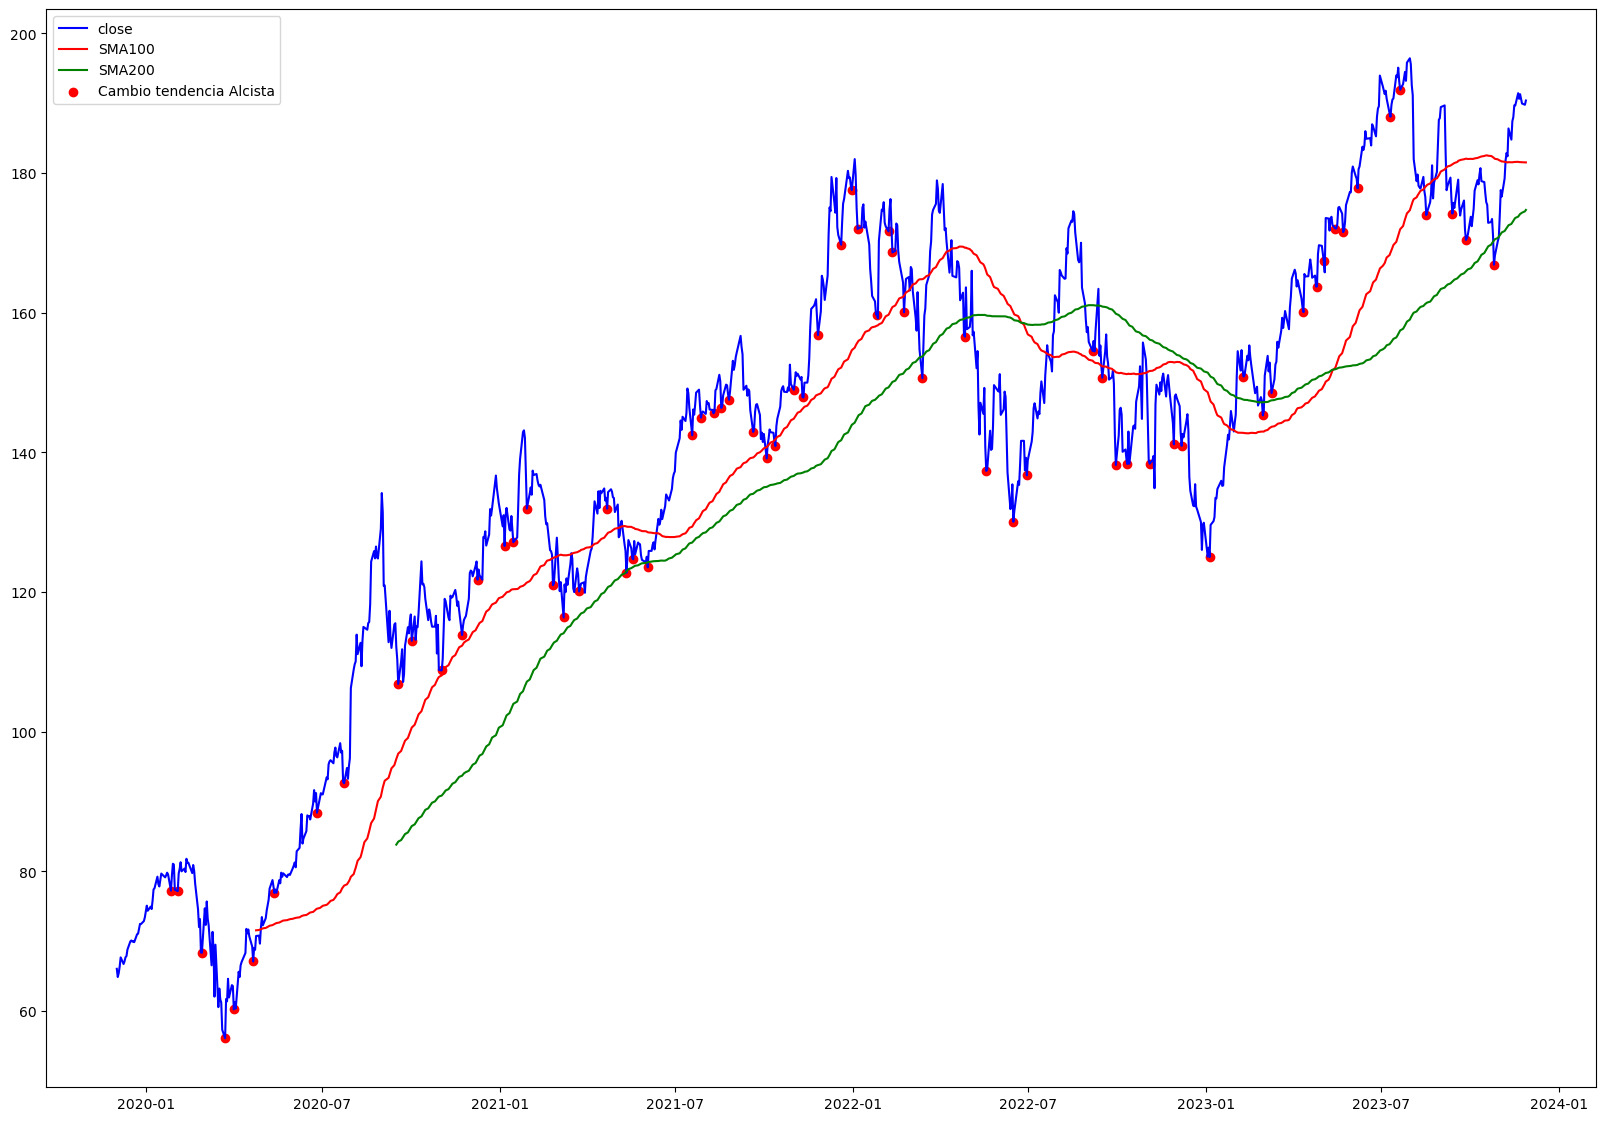

In [53]:
# grafico de cambios al alza, con promedios SMA100, SMA200, Para visualizar zonas baratas
fig = plt.figure(figsize=[20,14])
ax = fig.add_subplot(111)
#plt.subplot(121)
#plt.plot(highslows, color='green', label = 'close')
#plt.subplot(122)
plt.plot(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['close'], color='blue', label = 'close')
plt.plot(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['SMA100'], color='red', label = 'SMA100')
plt.plot(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['SMA200'], color='green', label = 'SMA200')
ax.scatter(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['close_min'], color='red', label = 'Cambio tendencia Alcista')
plt.legend(loc="upper left")

In [527]:
df_d2.head(50)

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200,close_min,close_max,pga01,open_sig,pga02,pga03
0,66.995003,66.327499,66.394997,66.959999,65235600,65.234581,2019-11-27,AAPL,NaN,NaN,NaN,NaN,0,66.650002,0,0
1,67.000000,66.474998,66.650002,66.812500,46617600,65.090866,2019-11-29,AAPL,NaN,NaN,NaN,NaN,0,66.817497,0,1
2,67.062500,65.862503,66.817497,66.040001,94487200,64.338280,2019-12-02,AAPL,NaN,NaN,NaN,NaN,0,64.577499,0,0
3,64.882500,64.072502,64.577499,64.862503,114430400,63.191120,2019-12-03,AAPL,NaN,NaN,64.862503,NaN,1,65.267502,0,1
4,65.827499,65.169998,65.267502,65.434998,67181600,63.748863,2019-12-04,AAPL,NaN,NaN,NaN,NaN,0,65.947502,0,1
5,66.472504,65.682503,65.947502,66.394997,74424400,64.684135,2019-12-05,AAPL,NaN,NaN,NaN,NaN,0,66.870003,0,1
6,67.750000,66.824997,66.870003,67.677498,106075600,65.933586,2019-12-06,AAPL,NaN,NaN,NaN,NaN,0,67.500000,0,0
7,67.699997,66.227501,67.500000,66.730003,128042400,65.010498,2019-12-09,AAPL,NaN,NaN,NaN,NaN,0,67.150002,0,1
8,67.517502,66.464996,67.150002,67.120003,90420400,65.390450,2019-12-10,AAPL,NaN,NaN,NaN,NaN,0,67.202499,0,1
9,67.775002,67.125000,67.202499,67.692497,78756800,65.948189,2019-12-11,AAPL,NaN,NaN,NaN,NaN,0,66.945000,0,0


In [71]:
##descarga de dataframe HORA
df_h = pd.DataFrame()
for ticker in tickers:
    company = yf.download(ticker, start = ini2_str, end = today_str, interval='60m')
    ## cambio de nombre de las columnas
    company.rename(columns={'Datetime':'datetime','Open':'open','High':'high','Low':'low','Close':'close','Adj Close':'adj close','Volume':'volume'}, inplace = True)
    company['date'] = pd.to_datetime (company.index.date)
    company['datetime'] = pd.to_datetime (company.index)    
    company['companyName'] = ticker
    company['SMA20'] = company['close'].rolling(20).mean()
    company.dropna(inplace=False)
    company['SMA40'] = company['close'].rolling(40).mean()
    company.dropna(inplace=False)
    company['SMA100'] = company['close'].rolling(100).mean()
    company.dropna(inplace=False)
    company['SMA200'] = company['close'].rolling(200).mean()
    company.dropna(inplace=False)
    
    df_h = pd.concat([df_h, company],ignore_index=True) 


'''
appl_hor = yf.download("AAPL, META", start = ini2_str, end = today_str, interval='60m')
## cambio de nombre de las columnas
appl_hor.rename(columns={'Datetime':'datetime','Open':'open','High':'high','Low':'low','Close':'close','Adj Close':'adj close','Volume':'volume'}, inplace = True)
appl_hor['date'] = pd.to_datetime (appl_hor.index.date)
appl_hor['datetime'] = pd.to_datetime (appl_hor.index)
'''

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


'\nappl_hor = yf.download("AAPL, META", start = ini2_str, end = today_str, interval=\'60m\')\n## cambio de nombre de las columnas\nappl_hor.rename(columns={\'Datetime\':\'datetime\',\'Open\':\'open\',\'High\':\'high\',\'Low\':\'low\',\'Close\':\'close\',\'Adj Close\':\'adj close\',\'Volume\':\'volume\'}, inplace = True)\nappl_hor[\'date\'] = pd.to_datetime (appl_hor.index.date)\nappl_hor[\'datetime\'] = pd.to_datetime (appl_hor.index)\n'

In [72]:
df_h.query("companyName=='META'")

,open,high,low,close,adj close,volume,date,datetime,companyName,SMA20,SMA40,SMA100,SMA200
3502,335.000000,335.809998,332.410004,335.029999,335.029999,4263603,2021-11-30,2021-11-30 09:30:00,META,NaN,NaN,NaN,NaN
3503,335.019989,335.619995,327.929993,329.230011,329.230011,3818372,2021-11-30,2021-11-30 10:30:00,META,NaN,NaN,NaN,NaN
3504,329.149994,329.549988,326.220001,327.579987,327.579987,2485049,2021-11-30,2021-11-30 11:30:00,META,NaN,NaN,NaN,NaN
3505,327.579987,328.119995,325.799988,326.464996,326.464996,2303632,2021-11-30,2021-11-30 12:30:00,META,NaN,NaN,NaN,NaN
3506,326.480011,328.183197,326.299988,326.940002,326.940002,2015707,2021-11-30,2021-11-30 13:30:00,META,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,335.989990,336.670013,335.807495,335.864990,335.864990,1066363,2023-11-28,2023-11-28 11:30:00,META,338.753363,337.994844,331.19145,319.884509
7000,335.850006,336.000000,334.320007,335.755005,335.755005,1018758,2023-11-28,2023-11-28 12:30:00,META,338.441913,338.052844,331.39010,319.944023
7001,335.730011,336.660004,335.350006,336.500000,336.500000,959075,2023-11-28,2023-11-28 13:30:00,META,338.210913,338.129692,331.59960,320.010848
7002,336.510010,337.561401,335.910004,337.149994,337.149994,1343313,2023-11-28,2023-11-28 14:30:00,META,337.985913,338.203442,331.81260,320.084598


In [34]:
#df_minval = pd.DataFrame()
#df_minval=df_h2.groupby('grupo').cumcount() + 1 df_h2[['companyName', 'date']].groupby('date').min()
#df_minval['date'] = df_minval.index
#df_minval.reset_index(inplace=True)
#df_minval
#df_pga3 = pd.merge(df_pga2, df_minval, on=['companyName','date'], how='inner') 

In [56]:
#agregamos columna de id_posiblegpa y id_ultdia que determina los dias de subida
df_h2 = pd.merge(df_h[['companyName','open','close','volume', 'datetime','date']], df_pga2[['companyName','date','id_posiblegpa','id_inidia', 'id_ultdia']], on = ['companyName','date'], how='left')
#Cierre anterior

In [57]:
#df_h2.query("id_posiblegpa==19 and companyName=='AAPL'").head(50)
#df_pga2.query("id_posiblegpa==15 and companyName=='AAPL'").head(50)

#appl_hor2.groupby('id_posiblegpa').count()
#appl_hor2['RN'] = appl_hor2.sort_values(['datetime'], ascending=[True]).groupby(['id_posiblegpa','date']).cumcount() + 1
#appl_hor2.query('id_posiblegpa==11')

#df_h.query("companyName=='AAPL' and date<='2021-11-15'").head(50)

#appl_hor2.dtypes
df_pga2


,companyName,date,open,close,id_posiblegpa,id_inidia,id_ultdia
0,AAPL,2020-11-03,109.660004,110.440002,1.0,1.0,0.0
1,AAPL,2020-11-04,114.139999,114.949997,1.0,0.0,0.0
2,AAPL,2020-11-05,117.949997,119.029999,1.0,0.0,0.0
3,AAPL,2020-11-06,118.320000,118.690002,1.0,0.0,0.0
4,AAPL,2020-11-09,120.500000,116.320000,1.0,0.0,1.0
...,...,...,...,...,...,...,...
134,META,2023-01-03,122.820000,124.739998,41.0,0.0,0.0
135,META,2023-01-04,127.379997,127.370003,41.0,0.0,1.0
136,META,2023-10-27,294.480011,296.730011,42.0,1.0,0.0
137,META,2023-10-30,299.089996,302.660004,42.0,0.0,0.0


In [58]:
#df_h2.query("id_posiblegpa>0").head(50)
#df_h2.query("id_posiblegpa==20").head(50)
#df_h2.query("companyName=='META' and id_posiblegpa>0").head(50)
df_h2.query("id_posiblegpa==17").head(50)
#df_pga2.groupby(['companyName','id_posiblegpa']).count()
#df_h2.query("id_posiblegpa>0").head(50)

,companyName,open,close,volume,datetime,date,id_posiblegpa,id_inidia,id_ultdia
1477,AAPL,138.210007,140.899994,30857431,2022-10-03 09:30:00,2022-10-03,17.0,1.0,0.0
1478,AAPL,140.910004,140.822205,14648705,2022-10-03 10:30:00,2022-10-03,17.0,1.0,0.0
1479,AAPL,140.822296,140.919998,10113895,2022-10-03 11:30:00,2022-10-03,17.0,1.0,0.0
1480,AAPL,140.910004,142.000000,11395010,2022-10-03 12:30:00,2022-10-03,17.0,1.0,0.0
1481,AAPL,142.000000,142.884995,9769829,2022-10-03 13:30:00,2022-10-03,17.0,1.0,0.0
1482,AAPL,142.880005,142.904999,14343788,2022-10-03 14:30:00,2022-10-03,17.0,1.0,0.0
1483,AAPL,142.899994,142.520004,10865050,2022-10-03 15:30:00,2022-10-03,17.0,1.0,0.0
1484,AAPL,145.029999,145.720001,22873405,2022-10-04 09:30:00,2022-10-04,17.0,0.0,0.0
1485,AAPL,145.720001,145.229996,13686825,2022-10-04 10:30:00,2022-10-04,17.0,0.0,0.0
1486,AAPL,145.229996,145.475006,8523497,2022-10-04 11:30:00,2022-10-04,17.0,0.0,0.0


In [59]:
#df_pga2.query("id_posiblegpa==2")
#df_pga2
#df_eval.query("id_posiblegpa==32")

NameError: name 'df_eval' is not defined

In [60]:
del df_h3

NameError: name 'df_h3' is not defined

In [61]:
# =====Se identifica el ultimo registro en hora, donde cerro en verde======
# =====el primer registro del bloque tiene que ser un GAP y vela verde======
# ===== la vela inicial de todos los dias, debe de ser verde, si no lo es, cortar =====
#del df_h3, df_eval, df_pga3, 
#solo dataframe de los registros de primer dia
df_pga3 = df_pga2.query("id_inidia==1")

df_eval = df_h2[['companyName','open','close','volume','datetime','date','id_posiblegpa', 'id_inidia','id_ultdia']].query('id_posiblegpa>0')
df_h3 = df_h2[['companyName','open','close','volume','datetime','date','id_posiblegpa', 'id_inidia','id_ultdia']].query('open<=close and 1<0')  
df_eval['hora'] = df_eval['datetime'].dt.hour

#recorrer df_pga2, datos a nivel de dia
for index, row in df_pga3.iterrows():
    print("index:",index, "fecha:", row['date'], "companyName:", row['companyName'], "id_posiblegpa:", row['id_posiblegpa'])
    companyName = row['companyName']
    id_posiblegpa = row['id_posiblegpa']
    id_firstvelabloque = 0
    # primera tupla del bloque debe de ser verde y GAP
    tupla0 = df_eval.query("companyName==@companyName and id_inidia==1 and hora==9 and id_posiblegpa==@id_posiblegpa and open<=close")
    if (len(tupla0.index)>0):
        id_firstvelabloque =1
    else:
        id_firstvelabloque =0
        
    if id_firstvelabloque ==1:        
        #verificar que cada dia inicie con vela verde, recorrer por cada id posiblegpa
        tupla1 = df_eval.query("companyName==@companyName and id_posiblegpa==@id_posiblegpa")   
        id_firstvelabloque2=0 #parar cuando inicie con vela verde y seguir con el siguiente id_posiblegpa
        #for i in tupla1.index:
        for index1, row1 in tupla1.iterrows():
            #fec_date = tupla1['date'][i]
            fec_date = row1['date']
            #fec_datetime = tupla1['datetime'][i]
            fec_datetime = row1['datetime']
            r1 = pd.DataFrame ({"companyName" : [row1['companyName']], "open" : [row1['open']], "close" : [row1['close']], "volume" : [row1['volume']], "datetime" : [row1['datetime']], "date" : [row1['date']], "id_posiblegpa" : [row1['id_posiblegpa']], "id_inidia" : [row1['id_inidia']], "id_ultdia" : [row1['id_ultdia']]})
            if id_firstvelabloque2<=0:  
                tupla2 = tupla1.query("date==@fec_date and hora==9 and open<=close")                
                if (len(tupla2.index)>0):
                    id_firstvelabloque2=0
                    
                    #Verificar si es ultimo dia (dato por dia, se supone que este termino con vela roja, por eso termina con la ultima vela verde)
                    if row1['id_ultdia']==0:
                        #print("i:",i, "id_posiblegpa:", id_posiblegpa,"fec_date:",fec_date,"fec_datetime:",fec_datetime, "id_ultdia:",row1['id_inidia'])
                        df_h3 = pd.concat([df_h3, r1],ignore_index=True)
                    else:
                        if row1['open']<=row1['close']:
                            #print("i:",i, "id_posiblegpa:", id_posiblegpa,"fec_date:",fec_date,"fec_datetime:",fec_datetime, "id_ultdia:",row1['id_inidia'],"open:",row1['open'],"close:",row1['close'])
                            df_h3 = pd.concat([df_h3, r1],ignore_index=True)
                else:
                    id_firstvelabloque2=1

index: 0 fecha: 2020-11-03 00:00:00 companyName: AAPL id_posiblegpa: 1.0
index: 5 fecha: 2020-11-24 00:00:00 companyName: AAPL id_posiblegpa: 2.0
index: 13 fecha: 2021-03-09 00:00:00 companyName: AAPL id_posiblegpa: 4.0
index: 15 fecha: 2021-05-13 00:00:00 companyName: AAPL id_posiblegpa: 5.0
index: 18 fecha: 2021-05-20 00:00:00 companyName: AAPL id_posiblegpa: 6.0
index: 20 fecha: 2021-06-04 00:00:00 companyName: AAPL id_posiblegpa: 7.0
index: 22 fecha: 2021-10-05 00:00:00 companyName: AAPL id_posiblegpa: 8.0
index: 26 fecha: 2021-10-14 00:00:00 companyName: AAPL id_posiblegpa: 9.0
index: 33 fecha: 2021-11-12 00:00:00 companyName: AAPL id_posiblegpa: 10.0
index: 36 fecha: 2022-03-15 00:00:00 companyName: AAPL id_posiblegpa: 12.0
index: 48 fecha: 2022-04-28 00:00:00 companyName: AAPL id_posiblegpa: 13.0
index: 51 fecha: 2022-06-17 00:00:00 companyName: AAPL id_posiblegpa: 15.0
index: 57 fecha: 2022-09-07 00:00:00 companyName: AAPL id_posiblegpa: 16.0
index: 59 fecha: 2022-10-03 00:00:0

In [62]:
df_h3.query("companyName=='AAPL' and id_posiblegpa==12")

,companyName,open,close,volume,datetime,date,id_posiblegpa,id_inidia,id_ultdia
0,AAPL,150.899994,152.020096,20824198,2022-03-15 09:30:00,2022-03-15,12.0,1.0,0.0
1,AAPL,152.024994,153.389999,11268331,2022-03-15 10:30:00,2022-03-15,12.0,1.0,0.0
2,AAPL,153.380005,154.529999,11216950,2022-03-15 11:30:00,2022-03-15,12.0,1.0,0.0
3,AAPL,154.539993,153.250000,6951192,2022-03-15 12:30:00,2022-03-15,12.0,1.0,0.0
4,AAPL,153.259903,153.225006,7880526,2022-03-15 13:30:00,2022-03-15,12.0,1.0,0.0
5,AAPL,153.210007,154.908997,10217936,2022-03-15 14:30:00,2022-03-15,12.0,1.0,0.0
6,AAPL,154.910004,155.160004,10323505,2022-03-15 15:30:00,2022-03-15,12.0,1.0,0.0
7,AAPL,157.050003,157.809998,22123880,2022-03-16 09:30:00,2022-03-16,12.0,0.0,0.0
8,AAPL,157.830002,157.979095,11447687,2022-03-16 10:30:00,2022-03-16,12.0,0.0,0.0
9,AAPL,157.979996,158.039993,6976232,2022-03-16 11:30:00,2022-03-16,12.0,0.0,0.0


In [63]:
#appl_hor2.dtypes
df_h3['hora'] = df_h3['datetime'].dt.hour

### volumen en hora por empresa, se promedia el volumen por empresa y lo guardamos en un DataFrame
df_promVol= df_h[['companyName', 'volume']].groupby('companyName').mean()
df_promVol['volume'] = df_promVol['volume'].astype(float)
#df_promVol['companyName'] = df_promVol.index
df_promVol = df_promVol.reset_index()

In [64]:
df_promVol

,companyName,volume
0,AAPL,9.355463e+06
1,META,3.847873e+06


In [65]:
#pga04: La primera vela es verde
'''def pga04(df_h3):
    if df_h3['id_posiblegpa']>0 and df_h3['open']<=df_h3['close'] and df_h3['hora']==9:
        return 1
    else:
        return 0
df_h3['pga04'] = df_h3.apply(pga04, axis=1)'''


#pga05: Una de las velas tiene que tener volumen (mas que promedio), evaluacion solo en el primer dia
def pga05(df_h3):    
    company = df_h3['companyName']
    tupla = df_promVol.query("companyName==@company")
    prom_vol = sum(tupla['volume'])
    if df_h3['volume']>prom_vol and df_h3['id_inidia']==1:
        return 1
    else:
        return 0
df_h3['pga05'] = df_h3.apply(pga05, axis=1)

#pga06: La vela de apertura del proximo dia es verde
'''def pga06(df_h3):
    if df_h3['id_posiblegpa']>0 and df_h3['open']<=df_h3['close'] and df_h3['hora']==9:
        return 1
    else:
        return 0
df_h3['pga06'] = df_h3.apply(pga06, axis=1)'''

"def pga06(df_h3):\n    if df_h3['id_posiblegpa']>0 and df_h3['open']<=df_h3['close'] and df_h3['hora']==9:\n        return 1\n    else:\n        return 0\ndf_h3['pga06'] = df_h3.apply(pga06, axis=1)"

In [66]:
#df_h.query("companyName=='AAPL'")['volume'].mean()
#df_promVol
#print(tickers)
#df_h3.query("id_posiblegpa==19")
#df_dias.query("companyName=='META'")

#df_h3.query("companyName=='AAPL'").head(50)
#df_h3.query("companyName=='AAPL' and id_posiblegpa==1")
df_h3

,companyName,open,close,volume,datetime,date,id_posiblegpa,id_inidia,id_ultdia,hora,pga05
0,AAPL,150.899994,152.020096,20824198,2022-03-15 09:30:00,2022-03-15,12.0,1.0,0.0,9,1
1,AAPL,152.024994,153.389999,11268331,2022-03-15 10:30:00,2022-03-15,12.0,1.0,0.0,10,1
2,AAPL,153.380005,154.529999,11216950,2022-03-15 11:30:00,2022-03-15,12.0,1.0,0.0,11,1
3,AAPL,154.539993,153.250000,6951192,2022-03-15 12:30:00,2022-03-15,12.0,1.0,0.0,12,0
4,AAPL,153.259903,153.225006,7880526,2022-03-15 13:30:00,2022-03-15,12.0,1.0,0.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...
219,META,303.820007,302.406006,2518142,2023-10-30 11:30:00,2023-10-30,42.0,0.0,0.0,11,0
220,META,302.364990,303.829987,2149673,2023-10-30 12:30:00,2023-10-30,42.0,0.0,0.0,12,0
221,META,303.807007,302.962097,2652594,2023-10-30 13:30:00,2023-10-30,42.0,0.0,0.0,13,0
222,META,302.920013,303.724091,2414330,2023-10-30 14:30:00,2023-10-30,42.0,0.0,0.0,14,0


In [67]:
# reiniciar id_posiblegpga, reiniciar casos trading
df_3_reinicio=df_h3[["companyName","id_posiblegpa"]].drop_duplicates(subset=["companyName","id_posiblegpa"])
df_3_reinicio['id_posiblegpa2'] = df_3_reinicio.groupby(["companyName"]).cumcount()+1
#agregamos columna de reinicio
df_h4 = pd.merge(df_h3, df_3_reinicio, on = ['companyName','id_posiblegpa'], how='left')

df_h4['id_posiblegpa'] = df_h4['id_posiblegpa2']
# Eliminar la columna 'Columna2'
df_h4 = df_h4.drop('id_posiblegpa2', axis=1)

In [68]:
df_h4['id_efectividad'] = ""

In [69]:
# efectividad: si tuvo mas de un dia de alza
df_diasunicos = df_h4[['companyName','id_posiblegpa','date']].drop_duplicates()

#id efectividad: indicador de efectivodad
def id_efectividad(df_h4):    
    company = df_h4['companyName']
    id_posiblegpa = df_h4['id_posiblegpa']
    id_velaverde=0
    #tiene mas de un dia de vida y el cierre es mayor que la apertura
    tupla = df_diasunicos.query("companyName==@company and id_posiblegpa==@id_posiblegpa")
    fec_minval = tupla['date'].min()
    fec_maxval = tupla['date'].max()
    print("company",company,"fec_minval:",fec_minval,"fec_maxval:",fec_maxval)
    tupla1 = df_d2.query("companyName==@company and (date>=@fec_minval and date<=@fec_maxval) and open<=close")            
    print("tupla1:",len(tupla1))
    if (len(tupla)>1) & (len(tupla1)>1):
        cant=1
    else:
        cant=0
    return cant
df_h4['id_efectividad'] = df_h4.apply(id_efectividad, axis=1)


#cantidad dias subio
def id_efectividad(df_h4):    
    company = df_h4['companyName']
    id_posiblegpa = df_h4['id_posiblegpa']
    tupla = df_diasunicos.query("companyName==@company and id_posiblegpa==@id_posiblegpa")
    cant=len(tupla)
    return cant
df_h4['cnt_diassubio'] = df_h4.apply(id_efectividad, axis=1)

company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:00 fec_maxval: 2022-03-18 00:00:00
tupla1: 4
company AAPL fec_minval: 2022-03-15 00:00:0

tupla1: 1
company AAPL fec_minval: 2023-01-06 00:00:00 fec_maxval: 2023-01-09 00:00:00
tupla1: 1
company AAPL fec_minval: 2023-01-06 00:00:00 fec_maxval: 2023-01-09 00:00:00
tupla1: 1
company AAPL fec_minval: 2023-10-27 00:00:00 fec_maxval: 2023-10-30 00:00:00
tupla1: 2
company AAPL fec_minval: 2023-10-27 00:00:00 fec_maxval: 2023-10-30 00:00:00
tupla1: 2
company AAPL fec_minval: 2023-10-27 00:00:00 fec_maxval: 2023-10-30 00:00:00
tupla1: 2
company AAPL fec_minval: 2023-10-27 00:00:00 fec_maxval: 2023-10-30 00:00:00
tupla1: 2
company AAPL fec_minval: 2023-10-27 00:00:00 fec_maxval: 2023-10-30 00:00:00
tupla1: 2
company AAPL fec_minval: 2023-10-27 00:00:00 fec_maxval: 2023-10-30 00:00:00
tupla1: 2
company AAPL fec_minval: 2023-10-27 00:00:00 fec_maxval: 2023-10-30 00:00:00
tupla1: 2
company AAPL fec_minval: 2023-10-27 00:00:00 fec_maxval: 2023-10-30 00:00:00
tupla1: 2
company AAPL fec_minval: 2023-10-27 00:00:00 fec_maxval: 2023-10-30 00:00:00
tupla1: 2
company AAPL fec_minval: 2023-10-

tupla1: 1
company META fec_minval: 2022-10-17 00:00:00 fec_maxval: 2022-10-17 00:00:00
tupla1: 1
company META fec_minval: 2022-10-17 00:00:00 fec_maxval: 2022-10-17 00:00:00
tupla1: 1
company META fec_minval: 2022-12-29 00:00:00 fec_maxval: 2022-12-30 00:00:00
tupla1: 2
company META fec_minval: 2022-12-29 00:00:00 fec_maxval: 2022-12-30 00:00:00
tupla1: 2
company META fec_minval: 2022-12-29 00:00:00 fec_maxval: 2022-12-30 00:00:00
tupla1: 2
company META fec_minval: 2022-12-29 00:00:00 fec_maxval: 2022-12-30 00:00:00
tupla1: 2
company META fec_minval: 2022-12-29 00:00:00 fec_maxval: 2022-12-30 00:00:00
tupla1: 2
company META fec_minval: 2022-12-29 00:00:00 fec_maxval: 2022-12-30 00:00:00
tupla1: 2
company META fec_minval: 2022-12-29 00:00:00 fec_maxval: 2022-12-30 00:00:00
tupla1: 2
company META fec_minval: 2022-12-29 00:00:00 fec_maxval: 2022-12-30 00:00:00
tupla1: 2
company META fec_minval: 2022-12-29 00:00:00 fec_maxval: 2022-12-30 00:00:00
tupla1: 2
company META fec_minval: 2022-12-

In [70]:
df_h4.query("id_posiblegpa==2 and companyName=='AAPL'")
#df_h4.query("id_efectividad==0")
#df_d2.query("companyName=='AAPL' and date=='2022-10-03' and open<=close")
#df_diasunicos.query("companyName=='AAPL' and date=='2022-10-03'")

,companyName,open,close,volume,datetime,date,id_posiblegpa,id_inidia,id_ultdia,hora,pga05,id_efectividad,cnt_diassubio
28,AAPL,159.250000,159.524994,29712866,2022-04-28 09:30:00,2022-04-28,2,1.0,0.0,9,1,0,2
29,AAPL,159.520004,161.414993,15373533,2022-04-28 10:30:00,2022-04-28,2,1.0,0.0,10,1,0,2
30,AAPL,161.419907,162.280106,11878260,2022-04-28 11:30:00,2022-04-28,2,1.0,0.0,11,1,0,2
31,AAPL,162.289993,163.460007,11496526,2022-04-28 12:30:00,2022-04-28,2,1.0,0.0,12,1,0,2
32,AAPL,163.475006,163.093094,10624158,2022-04-28 13:30:00,2022-04-28,2,1.0,0.0,13,1,0,2
33,AAPL,163.100006,163.919998,12389175,2022-04-28 14:30:00,2022-04-28,2,1.0,0.0,14,1,0,2
34,AAPL,163.929993,164.054993,13223821,2022-04-28 15:30:00,2022-04-28,2,1.0,0.0,15,1,0,2
35,AAPL,161.839996,163.119995,37282362,2022-04-29 09:30:00,2022-04-29,2,0.0,1.0,9,0,0,2


In [77]:
#agregamos columna de id_posiblegpa y id_ultdia que determina los dias de subida
df_h5 = pd.merge(df_h4[['companyName','date','datetime','id_posiblegpa','id_inidia', 'id_ultdia','id_efectividad','cnt_diassubio']], df_h[['companyName','high','low','open','close','volume', 'datetime','SMA20','SMA40','SMA100','SMA200']], on = ['companyName','datetime'], how='left')
#df_h2 = pd.merge(df_h[['companyName','open','close','volume', 'datetime','date']], df_pga2[['companyName','date','id_posiblegpa','id_inidia', 'id_ultdia']], on = ['companyName','date'], how='left')C:\Users\carlo\OneDrive\Documentos\TRADER\traderapp\pages\diario.py

In [83]:
#df_h5.query("companyName=='AAPL' and id_posiblegpa==2")

224

In [86]:
#pd.unique(appl_hor3['id_posiblegpa'])
#specify path for export

import os
   
path = r'C:\Users\carlo\OneDrive\Documentos\TRADER\traderapp\data\pga_h.txt'

# check whether the file exists
if os.path.exists(path):
    # delete the file
    os.remove(path)
else:
    # if the file does not exist.
    print("File does not exists. File needs to be created.")

#export DataFrame to text file
with open(path, 'a') as f:
    #df_string = appl_hor3.to_string(header=True, index=False, sep ='\t')
    df_h5.to_csv(path, header=True, index=None, sep='\t', mode='w')
    #f.write(df_string)